<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/Sprint2_Mini_Project_(1%E1%84%8C%E1%85%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint 2 Mini Project**

## Sprint 학습 목표
- 베이지안 정리를 활용하여 확률을 업데이트하는 과정을 이해한다.
- 통계적 개념들을 학습하고, 데이터셋을 통해 확인할 수 있다.
- 가설을 수립하고, 검정하여 통계적으로 유의한 인사이트를 도출할 수 있다.

## Project 문제 정의

### 배경
> 여러분께서는 호텔 숙박업 중개 플랫폼 회사의 데이터 분석 업무 담당자입니다.<br>
주요 타겟 지역은 **포르투갈**이며, 효율적으로 호텔을 중개하고 매출액을 늘리기 위해서는 가설을 세우고 검정하여 추론하는 과정이 필수입니다.<br>
<br>
프로젝트의 주요 과제는, 데이터셋을 바탕으로, 강의 노트에서 배운 통계적 지표를 연습해보고 인사이트를 도출하는 것입니다.
<br>
현재 상황 분석 및 예약 취소율 감소를 위한 다양한 가설을 수립하고 검정하여, 통계적으로 유의미한 비즈니스 인사이트를 도출하는 프로젝트를 진행해보세요.

### 목표

> - 베이지안 정리를 활용하여, 확률을 업데이트하는 과정을 이해한다.
- 데이터셋을 바탕으로, 다양한 통계 이론을 연습하고 학습한다.
- 가설을 수립하고 검정하는 과정을 통해, 통계적으로 유의한지 확인한다.

## **N121 Bayes Theorem**

### 오늘의 목표
- 베이지안 이론을 활용하여, 몬티홀 문제를 설명할 수 있다.
- 주어진 데이터셋을 바탕으로, 베이지안 이론을 활용할 수 있다.

### `Topic 1` : 몬티홀 문제


다음 [영상](https://www.youtube.com/watch?v=UexhMS_F5Qw)에서 등장하는 몬티홀 딜레마 문제를 베이지안 공식을 활용하여 해결해보세요.

- 처음에 1번 문을 선택했다고 가정합니다. 진행자가 남은 두 개의 문 중 염소가 있는 문 하나를 공개한 상태에서 기존에 선택했던 문(1번문)에 자동차가 있을 확률을 구하세요. 

- 처음 선택을 유지하는 것이 유리한지, 아니면 선택을 바꾸는 것이 유리한지 생각해보세요.

```
Hypothesis: 1번 문 뒤에 자동차가 있음
Evidence: 진행자가 염소가 있는 문을 열어줌

우리가 알고자 하는 것: P(H|E) -> 진행자가 염소가 있는 문을 열었을 때, 우리가 먼저 선택했던 문 안에 자동차가 있을 확률
```


#### **1-1. 진행자가 남은 두 개의 문 중 염소가 있는 문 하나를 공개한 상태에서 기존에 선택했던 문에 자동차가 있을 확률을 구하세요.**
- 처음에 1번 문을 선택했다고 가정합니다.

In [ ]:
close_car = 1/3 #자동차가 있을 확률
close_goat = 2/3 #염소가 있을 확률

open_car = 1/2 #오픈 했을때 자동차가 있을 확률
open_goat = 1/2 #오픈 했을때 염소가 있을 확률

notchange = close_car * open_car / ((close_car * open_car) + (close_goat*open_goat))
notchange

0.3333333333333333

#### **1-2. 선택을 바꾸시겠습니까?**
- 처음에 했던 선택을 유지하는 것이 유리할지, 아니면 선택을 바꾸는 것이 유리할지 생각해보세요.

In [ ]:
1 - notchange

0.6666666666666667

### **데이터셋 불러오기 : Hotel 데이터셋**
분석에 앞서, 아래의 데이터셋 설명을 통해 어떤 정보를 가진 데이터셋인지 파악 후 코드를 통해 데이터셋을 불러오세요.

<br>

> **hotel 데이터셋 설명 (Description)** <br>
호텔 숙박 플랫폼에 등록된 예약 정보 데이터
- 이전에 플랫폼을 사용하여 예약한 경험 + 취소 이력이 없는 사람으로 이루어진 데이터셋

- `hotel` : 호텔 종류
- `is_canceled` : 예매 취소 여부
- `lead_time` : 예매한 날짜와 도착 날짜 사이에 경과된 일수
- `arrival_date_year` : 도착 연도
- `arrival_date_month` : 도착 월
- `arrival_date_week_number` : 도착한 주 (e.g. 5주차)
- `arrival_date_day_of_month` : 도착한 날짜(일)
- `stays_in_weekend_nights` : 총 숙박 기간 중 주말 숙박의 개수

- `stays_in_week_nights` : 총 숙박 기간 중 주중 숙박의 개수
- `adults` : 숙박 고객 중 어른의 숫자
- `children` : 숙박 고객 중 아이의 숫자
- `deposit_type` : 보증금 종류
- `days_in_waiting_list` : 고객이 예약을 확정하기 전 대기 리스트에 있던 일수
- `adr` : 일일 평균 객실료 (모든 숙박 거래의 합계를 총 숙박 일수로 나눈 평균 일 요금)
- `arrival_date` : 도착 날짜
- `arrival_day` : 도착 요일
- `reservation_status` : 예약 상태
- `reservation_status_date` : 예약 상태가 변화한 날짜
- `status_changed_day` : 예약 상태가 변화한 요일

In [ ]:
import math
import pandas as pd

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
hotel = pd.read_csv('hotel.csv')
hotel.head()

### `Topic 2` : 베이지안 정리 적용

#### **2-1. 고객이 리조트 호텔을 예약했을 때, 예약을 취소할 확률은 어떻게 변하나요?**
> Bayesian Theorem의 공식을 대입해보면 아래와 같습니다. <br>
<br>
> $P(cancel|resort) = P(cancel \cap resort) / P(resort) = P(resort|cancel)P(cancel) / P(resort)$
<br>

- 예약을 취소하는 사전 확률($P(cancel)$)은 **이유 불충분의 원리**에 따라 `0.5`로 설정합니다.
- 데이터셋을 바탕으로, 아래의 확률을 도출해보세요.
  - 예매를 취소했는데, Resort Hotel을 예약한 경우 ($P(resort|cancel)$) : `resort_yes_cancel`
  - 예매를 취소하지 않았는데, Resort Hotel을 예약한 경우 ($P(resort|not \; cancel)$) : `resort_no_cancel`
- 상기한 경우들을 바탕으로, 베이지안 정리를 통해 사전 확률을 업데이트하는 함수를 완성해보세요.
   - 다음 `bayesian_hotel` 함수를 완성하여 사후확률을 구하는 것이 어렵다면, warm-up 영상에서 나온 사각형 방식으로 사후확률을 계산해보세요.



In [ ]:
# Resort Hotel을 예약했을 때, 예매를 취소할 확률 = posterior (사후 확률)

def bayesian_hotel(prior, resort_yes_cancel, resort_no_cancel):
  '''
  parameters:
    - prior: 사전 확률 (예약을 취소할 확률)
    - resort_yes_cancel: 예매를 취소했는데 resort hotel을 예약한 경우
    - resort_no_cancel: 예매를 취소하지 않았는데 resort hotel을 예약한 경우
  
  return:
    - posterior: 사후 확률

  '''
  # 이곳에 코드를 작성하세요

  nprior = 1 - prior
  posterior = prior*resort_yes_cancel / ((prior*resort_yes_cancel) + (nprior*resort_no_cancel))
  
  return posterior

#P(resort|cancel)P(cancel)/P(resort)

### **Conclusion**
> * 고객이 리조트 호텔을 예약했을 때, 예약을 취소할 확률은 어떻게 변하는지 설명해주세요.
* 베이지안 정리에 대해 정의해보고 실생활에서 사용되는 예시를 찾아보세요.

In [ ]:
hotel_canceled = hotel[['hotel', 'is_canceled']]
hotel_canceled

In [ ]:
hotel_canceled.isnull().sum()

In [ ]:
prior = 0.5

resort_yes_cancel = hotel[hotel["is_canceled"]==1]["hotel"].value_counts(normalize=True)["Resort Hotel"]
resort_no_cancel = hotel[hotel["is_canceled"]==0]["hotel"].value_counts(normalize=True)["Resort Hotel"]
print(resort_yes_cancel,resort_no_cancel)

In [ ]:
bayesian_hotel(prior, resort_yes_cancel, resort_no_cancel)

In [ ]:
#박희영 풀이

'''
[!] 구해야할 것
예매를 취소했는데, Resort Hotel을 예약한 경우 ( P(resort|cancel) ) : resort_yes_cancel
예매를 취소하지 않았는데, Resort Hotel을 예약한 경우 ( P(resort|notcancel) ) : resort_no_cancel
'''

#리조트를 예약한 사람 중 예약 유지-취소 비율
hotel[hotel["hotel"]=="Resort Hotel"]['is_canceled'].value_counts(normalize=True)

In [ ]:
#호텔을 예약한 사람 중 예약 유지-취소 비율
hotel[hotel["hotel"]=="City Hotel"]['is_canceled'].value_counts(normalize=True)

In [ ]:
#함수에 들어갈 변수 지정
resort_cancel = hotel[hotel["hotel"]=="Resort Hotel"]['is_canceled'].value_counts(normalize=True)[1]
city_cancel = hotel[hotel["hotel"]=="City Hotel"]['is_canceled'].value_counts(normalize=True)[1]

print(resort_cancel, city_cancel)

In [ ]:
def hohotel(prior, resort_cancel, city_cancel):
  resort_yes_cancel = prior*resort_cancel / ( prior*resort_cancel + prior*city_cancel )
  resort_no_cancel =  (1 - prior) * (1 - resort_cancel) / ( (1 - prior)*(1 - resort_cancel) + (1 - prior)*(1 - city_cancel) )
  print("resort_yes_cancel:", resort_yes_cancel, ", resort_no_cancel:", resort_no_cancel)

hohotel(prior, resort_cancel, city_cancel)

#### **Optional. 예약한 호텔 종류 외에, 다양한 데이터를 바탕으로 위에서 구한 확률을 업데이트 해보세요.**
- 다양한 column의 데이터를 활용하여, 위에서 구한 확률을 사전확률로 설정하고 베이지안 정리를 통해 업데이트 해보세요.

## **N122 CLT**

### 오늘의 목표
- 큰 수의 법칙, 중심극한정리, 부트스트래핑, 신뢰구간에 대해 설명할 수 있다.
- 주어진 데이터셋에서, 통계적 개념을 직접 적용하고 시각화를 통해 확인할 수 있다.

### `Topic 1` : 통계적 개념 정리하기
> 큰 수의 법칙, 중심극한정리, 부트스트래핑, 신뢰구간에 대해 요약하여 정리해보세요.

In [ ]:
# 큰 수의 법칙 : 동일한 확률 분포에서 무작위로 추출된 표본의 평균이 표본의 크기가 커질수록 전체 모집단의 평균에 가까워진다는 이론
# 중심극한정리 : 동일한 분포에서 무작위로 추출된 표본의 평균이 표본의 크기가 커질수록 정규분포를 따른다는 이론
# 부트스트래핑 : 표본에서 샘플을 반복적으로 추출하고, 이를 통해 모집단의 특성을 추정하는 방법
# 신뢰구간 : 표본에서 추출된 통계량(예: 평균)이 포함될 것으로 예상되는 구간을 나타내는 것

### `Topic 2` : 통계적 개념 적용하기
> `hotel` 데이터셋의 column들을 활용하여, N122의 통계적 개념 `(큰 수의 법칙, 중심극한정리, 신뢰 구간)`을 적용하고 시각화해보세요.
- `hotel` 데이터셋 내 다양한 column의 분포를 확인해보세요.
- `N122` 강의 노트의 코드를 참고하여, 데이터셋의 column에서 확인할 수 있는 통계적 개념을 시각화를 통해 나타내보세요.


In [ ]:
import pandas as pd

hotel = pd.read_csv('hotel.csv')
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,deposit_type,days_in_waiting_list,adr,arrival_date,arrival_day,reservation_status,reservation_status_date,status_changed_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,No Deposit,0,0.00,2015-07-01,Wednesday,Check-Out,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,No Deposit,0,0.00,2015-07-01,Wednesday,Check-Out,2015-07-01,Wednesday
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,No Deposit,0,75.00,2015-07-01,Wednesday,Check-Out,2015-07-02,Thursday
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,No Deposit,0,75.00,2015-07-01,Wednesday,Check-Out,2015-07-02,Thursday
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,No Deposit,0,98.00,2015-07-01,Wednesday,Check-Out,2015-07-03,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,City Hotel,0,23,2017,8,35,30,2,5,2,0.0,No Deposit,0,96.14,2017-08-30,Wednesday,Check-Out,2017-09-06,Wednesday
110019,City Hotel,0,102,2017,8,35,31,2,5,3,0.0,No Deposit,0,225.43,2017-08-31,Thursday,Check-Out,2017-09-07,Thursday
110020,City Hotel,0,34,2017,8,35,31,2,5,2,0.0,No Deposit,0,157.71,2017-08-31,Thursday,Check-Out,2017-09-07,Thursday
110021,City Hotel,0,109,2017,8,35,31,2,5,2,0.0,No Deposit,0,104.40,2017-08-31,Thursday,Check-Out,2017-09-07,Thursday


#### **2-1. 큰 수의 법칙 (Law of Large Numbers)**
- 무작위 column을 한 가지 선택하여, 분포를 확인하고 큰 수의 법칙을 시각화 해보세요.
  - sample의 갯수가 3, 10, 30 일 때의 평균값이 어떻게 변화하는지 확인해보세요.
  - 어떤 경우에, 전체 데이터의 평균값과 가장 유사한 평균값을 가지게 되나요?

In [ ]:
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

#hotel_adr = hotel['adr']
#hotel_adr.mean()
#sample_3_mean = hotel_adr.sample(3,random_state = 2, replace = True).mean()
#sample_10_mean = hotel_adr.sample(10,random_state = 2, replace = True).mean()
#sample_30_mean = hotel_adr.sample(30, random_state = 2, replace = True).mean()
#show = pd.DataFrame({'size':[3, 10, 30, '모평균'], 'mean':[int(sample1), int(sample2), int(sample3), hotel_adr.mean()]}).reset_index()
#show = show.drop('index', axis = 1)
#print(show)

#결과를 확인해보니 표본 크기가 10개인 경우가 30개인 경우보다 모평균에 더 가까웠다。 
#그 이유는 랜덤하게 뽑혔기 때문이다。 따라서 표본 크기가 3개 10개 30개로 각각 Bootstrapping을 돌려보았다。 
#그 결과 표본의 크기가 클수록 표본평균의 평균이 모평균에 가까워졌다。


In [ ]:
hotel_adr = hotel['adr']

np.random.seed(38)

s1 = []
s2 = []
s3 = []

for i in range(len(hotel_adr)):
    sample = np.random.choice(hotel_adr, size=3, replace=True)
    s1.append(sample.mean())

    sample2 = np.random.choice(hotel_adr, size=10, replace=True)
    s2.append(sample2.mean())

    sample3 = np.random.choice(hotel_adr, size=30, replace=True)
    s3.append(sample3.mean())

In [ ]:
s1 = np.array(s1)
s2 = np.array(s2)
s3 = np.array(s3)

s1_mean = s1.mean()
s2_mean = s2.mean()
s3_mean = s3.mean()


print(hotel_adr.mean(), s1_mean, s2_mean, s3_mean)

104.32885223998619 104.41810715335278 104.36944548867055 104.32507876534905


In [ ]:
show = pd.DataFrame({'size':[3, 10, 30, '모평균'], 'mean':[s1_mean, s2_mean, s3_mean, hotel_adr.mean()]}).reset_index()
show = show.drop('index', axis = 1)
show

,size,mean
0,3,104.418107
1,10,104.369445
2,30,104.325079
3,모평균,104.328852


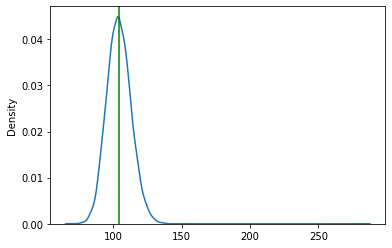

In [ ]:
hotel_adr = hotel['adr']
random.seed(10)
a = []
for _ in range(10000):
    sample = np.random.choice(hotel_adr, 30, replace=True)
    a.append(sample.mean())

lower, upper = round(np.percentile(a, 2.5),5), round(np.percentile(a, 97.5),5)

sns.kdeplot(a);
plt.axvline(np.mean(a), c='green', label='Mean')


#### **2-2. 중심극한정리 (Central Limit Theorem)**
- 무작위 column 2개를 선택하여, 분포를 확인하고 부트스트랩을 활용하여 중심극한정리를 시각화 해보세요.
  - 선택한 column을 모집단이라고 가정한 후, 부트스트랩을 활용하여 표본 평균 분포의 모양을 확인해보세요.
  - 부트스트랩 횟수는 10000회로 지정하세요.
  - 다양한 모양의 분포를 갖는 column들로 표본 평균의 분포를 시각화 해보시는 것을 추천드립니다.

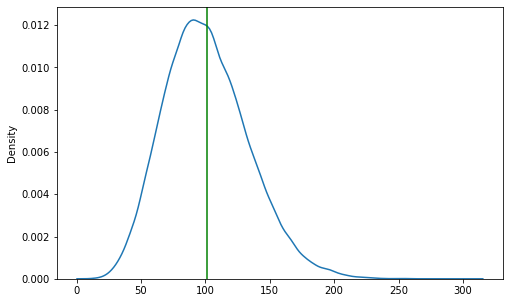

In [ ]:
import matplotlib.pyplot as plt

hotel_lead = hotel['lead_time']

s4 = []

for i in range(len(hotel_lead)):
    sample = np.random.choice(hotel_lead, size=10, replace=True)
    s4.append(sample.mean())

plt.figure(figsize=(8,5)) 
sns.kdeplot(s4)
plt.axvline(np.mean(s4), color='green', label = 'Mean')

#### **2-3. 신뢰구간 (Confidence Interval)**
- 2-2. 중심극한정리에서 사용한 column 중 하나를 골라, 표본 평균의 분포를 그리고 신뢰 구간을 표시해보세요.
  - 신뢰 수준 90%, 95%, 99%를 갖는 신뢰구간을 그려보고 구간의 크기가 어떻게 변하는지 확인해보세요.
  - 신뢰구간이 넓어지거나 좁아졌을 때의 장단점에 대해 생각해보세요. (e.g. 어떤 경우에는 신뢰구간을 넓게 설정하는 것이 좋을까요?)

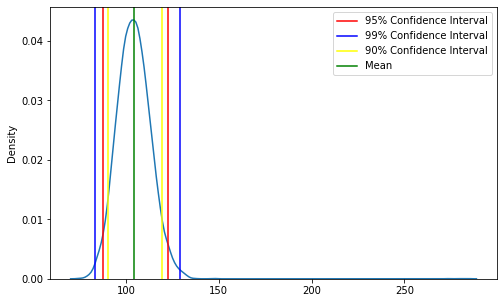

In [ ]:
hotel_adr = hotel['adr']
random.seed(10)
a = []
for _ in range(10000):
    sample = np.random.choice(hotel_adr, 30, replace=True)
    a.append(sample.mean())

lower95, upper95 = round(np.percentile(a, 2.5),5), round(np.percentile(a, 97.5),5)
lower90, upper90 = round(np.percentile(a, 5),5), round(np.percentile(a, 95),5)
lower99, upper99 = round(np.percentile(a, 0.5),5), round(np.percentile(a, 99.5),5)

plt.figure(figsize=(8,5))
sns.kdeplot(a);
plt.axvline(lower95, c='red', label='95% Confidence Interval')
plt.axvline(lower99, c='blue', label='99% Confidence Interval')
plt.axvline(lower90, c='yellow', label='90% Confidence Interval')
plt.axvline(upper95, c='red')
plt.axvline(upper99, c='blue')
plt.axvline(upper90, c='yellow')
plt.axvline(np.mean(a), c='green', label='Mean')
plt.legend();

51.8 154.1667
44.5 166.3333
32.5 192.3333


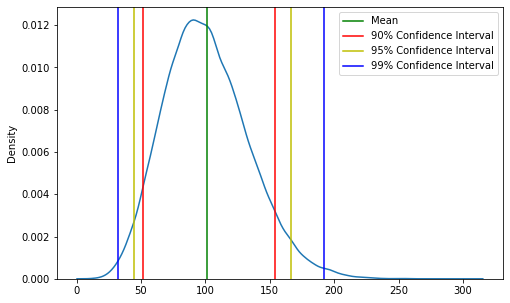

In [ ]:
plt.figure(figsize=(8,5)) 
sns.kdeplot(s4)
plt.axvline(np.mean(s4), color='green', label = 'Mean')

# 신뢰구간
lower, upper = np.percentile(s4, 5), np.percentile(s1, 95)
print(round(lower, 4), round(upper, 4))
plt.axvline(lower, color='red', label = '90% Confidence Interval')
plt.axvline(upper, color='red')
lower, upper = np.percentile(s4, 2.5), np.percentile(s1, 97.5)
print(round(lower, 4), round(upper, 4))
plt.axvline(lower, color='y', label = '95% Confidence Interval')
plt.axvline(upper, color='y')
lower, upper = np.percentile(s4, 0.5), np.percentile(s1, 99.5)
print(round(lower, 4), round(upper, 4))
plt.axvline(lower, color='b', label = '99% Confidence Interval')
plt.axvline(upper, color='b')
plt.legend()

### **Conclusion**
> * 위의 코드를 실행한 결과를 통해 배운 오늘 배운 내용에 대해 요약해서 정리해보세요.
  - 큰 수의 법칙 (Law of Large Numbers)
  - 중심극한정리 (Central Limit Theorem)
  - 부트스트래핑 (Bootstraping)
  - 신뢰구간 (Confidence Interval)

In [ ]:
# 큰 수의 법칙 (Law of Large Numbers) : 샘플 사이즈 多 -> 샘플의 통계치가 모집단의 모수에 가까워짐.
# 중심극한정리 (Central Limit Theorem) : 모집단의 분포 無 -> But, 임의의 분포에서 추출된 표본들의 분포는 정규분포를 이룸.
# 부트스트래핑 (Bootstraping) : 중복추출 許 -> 원하는 개수 데이터 추출.
# 신뢰구간 (Confidence Interval) : 특정 값 예측 X -> 모수를 포함하고 있을 구간을 말함.